# Calling in Libraries

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import yfinance as yf

Defining Stock Symbols that make up SOXL and  getting historical financial data

In [ ]:
# Define the stock symbols
stock_symbols = ['NVDA', 'AVGO', 'AMD', 'QCOM', 'MU']

# Define the start and end dates
start_date = '2019-01-01'
end_date = '2024-10-01'


In [ ]:
import yfinance as yf

stock_symbols = ['SOXL']
start_date = '2019-01-01'
end_date = '2024-10-01'

data = yf.download(stock_symbols[0], start=start_date, end=end_date)
data.to_csv('SOXL_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


Getting the Data itself

In [ ]:
data = {} # create an empty dictionary for storage of data

#Looping through the dictionary
for symbol in stock_symbols:
    #Getting the data from the API
    ticker = yf.Ticker(symbol)
    data[symbol] = ticker.history(start = start_date, end = end_date)

#printing the data

for symbol, df in data.items():
    print(f'Data for {symbol}:')
    print(df.head()) # printing the first 5 rows of the data for a small glance
    print()

stock_data = pd.concat(data, keys = data.keys())



Data for NVDA:
                               Open      High       Low     Close     Volume  \
Date                                                                           
2019-01-02 00:00:00-05:00  3.239936  3.434371  3.225303  3.378322  508752000   
2019-01-03 00:00:00-05:00  3.318057  3.352034  3.166775  3.174215  705552000   
2019-01-04 00:00:00-05:00  3.247376  3.415771  3.216623  3.377578  585620000   
2019-01-07 00:00:00-05:00  3.434868  3.593343  3.383531  3.556390  709160000   
2019-01-08 00:00:00-05:00  3.637984  3.640216  3.395187  3.467853  786016000   

                           Dividends  Stock Splits  
Date                                                
2019-01-02 00:00:00-05:00        0.0           0.0  
2019-01-03 00:00:00-05:00        0.0           0.0  
2019-01-04 00:00:00-05:00        0.0           0.0  
2019-01-07 00:00:00-05:00        0.0           0.0  
2019-01-08 00:00:00-05:00        0.0           0.0  

Data for AVGO:
                                Open 

In [ ]:
stock_data.to_csv('stock_data.csv', index=False)

Scrape News articles

In [ ]:
!pip install requests
!pip install transformers

In [ ]:
!pip install tavily-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:00


In [8]:
import os
from tavily import TavilyClient

# Set the API key directly
os.environ['TAVILY_API_KEY'] = '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'

# Connect to Tavily
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

# Nvida news articles

In [ ]:
result = client.search("NVIDIA news articles with summary",
                       include_answer=True,
                       parameters={"answer_type": "news", "summary": True})

import pandas as pd

# Create a DataFrame to store the results
df = pd.DataFrame([{"title": result["title"], "summary": result["summary"]}])

# Save the DataFrame to a CSV file
df.to_csv('nvidia_news_articles_with_summary.csv', index=False)

In [ ]:
print(result)

{'query': 'NVIDIA news articles with summary', 'follow_up_questions': None, 'answer': "NVIDIA recently announced collaborations with Google Quantum AI for quantum computing device design, the adoption of NVIDIA BioNeMo Framework in drug discovery, and working with the cloud-native community to advance AI and ML. Jensen Huang, NVIDIA's CEO, unveiled new cloud services supporting AI workflows and the launch of next-gen RTX GPUs during the recent GTC keynote. The company is also partnering with Deloitte to bring AI and Omniverse services to enterprises. NVIDIA's Omniverse is gaining wide adoption, with new products like the Jetson Orin Nano for Robotics being introduced.", 'images': [], 'results': [{'title': 'News Archive | NVIDIA Newsroom', 'url': 'https://nvidianews.nvidia.com/news', 'content': 'News Archive | NVIDIA Newsroom About NVIDIA NVIDIA Blog NVIDIA Blog NVIDIA Blog SC24 -- NVIDIA today announced an NVIDIA Omniverse™ Blueprint that enables industry software developers to help th

Scraping and Analyzing news articles

# AMD news articles

In [ ]:
result = client.search("Advanced Micro Devices news articles with summary",
                       include_answer=True,
                       parameters={"answer_type": "news", "summary": True})

import pandas as pd

# Extract articles
data = []
for article in result.get("results", []):  # Iterate through the results list
    data.append({
        "title": article.get("title", "No Title"),   # Default if 'title' is missing
        "summary": article.get("content", "No Summary")  # Use 'content' for summaries
    })

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('AMD_news_articles_with_summary.csv', index=False)

print("AMD news articles saved successfully!")


AMD news articles saved successfully!


# Qualcomm Incorporated news articles

In [ ]:
result = client.search("Qualcomm Incorporated news articles with summary",
                       include_answer=True,
                       parameters={"answer_type": "news", "summary": True})

import pandas as pd

# Extract articles
data = []
for article in result.get("results", []):  # Iterate through the results list
    data.append({
        "title": article.get("title", "No Title"),   # Default if 'title' is missing
        "summary": article.get("content", "No Summary")  # Use 'content' for summaries
    })

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('Qualcomm_Inc_news_articles_with_summary.csv', index=False)

print("Qualcomm news articles saved successfully!")


Qualcomm news articles saved successfully!


# Broadcom news articles

In [ ]:
result = client.search("Broadcom news articles with summary",
                       include_answer=True,
                       parameters={"answer_type": "news", "summary": True})


# Extract articles
data = []
for article in result.get("results", []):  # Iterate through the results list
    data.append({
        "title": article.get("title", "No Title"),   # Default to "No Title" if missing
        "summary": article.get("content", "No Summary")  # Use 'content' for summaries
    })

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('Broadcom_news_articles_with_summary.csv', index=False)

print("Broadcom news articles saved successfully!")


Broadcom news articles saved successfully!


# Micron News Articles

In [ ]:
result = client.search("Micron Technology news articles with summary",
                       include_answer=True,
                       parameters={"answer_type": "news", "summary": True})


# Extract articles
data = []
for article in result.get("results", []):  # Iterate through the results list
    data.append({
        "title": article.get("title", "No Title"),   # Default to "No Title" if missing
        "summary": article.get("content", "No Summary")  # Use 'content' for summaries
    })

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('Micron_Tech_news_articles_with_summary.csv', index=False)

print("Micron news articles saved successfully!")


Micron news articles saved successfully!


# Sentiment Analysis / Project Steps

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, LSTM
from transformers import pipeline # Using this for the BERT model for finance.



# Combining Data

In [ ]:
import os
import pandas as pd
import string
from transformers import pipeline

# Print current working directory
print("Current Working Directory:", os.getcwd())

# List of file names containing news articles
file_names = [
    'AMD_news_articles_with_summary.csv',
    'Broadcom_news_articles_with_summary.csv',
    'Micron_Tech_news_articles_with_summary.csv',
    'nvidia_news_articles_with_summary.csv',
    'Qualcomm_Inc_news_articles_with_summary.csv'
]

# Directory where files are stored
directory = "."  # Assuming files are in the current directory


Current Working Directory: /content


In [ ]:
# Create an empty DataFrame to store combined data
combined_news_data = pd.DataFrame()

# Loop through the files and combine data
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    try:
        stock_news = pd.read_csv(file_path)
        combined_news_data = pd.concat([combined_news_data, stock_news], ignore_index=True)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Save combined data to a new file
output_file = os.path.join(directory, "combined_news_articles_with_summaries.csv")
combined_news_data.to_csv(output_file, index=False)
print(f"Combined news data saved to: {output_file}")


Combined news data saved to: ./combined_news_articles_with_summaries.csv


In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Ensure the text is a string (handles NaN values)
    if not isinstance(text, str):
        return ""
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Strip whitespace
    text = text.strip()
    return text

# Apply preprocessing to the 'summary' column
if 'summary' in combined_news_data.columns:
    combined_news_data['clean_summary'] = combined_news_data['summary'].apply(preprocess_text)
else:
    print("Error: 'summary' column not found in the combined news data.")


In [ ]:
# Initialize FinBERT sentiment analysis pipeline
try:
    sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")
except Exception as e:
    print(f"Error initializing FinBERT sentiment analysis pipeline: {e}")
    sentiment_pipeline = None


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
# Apply sentiment analysis if the pipeline is initialized
if sentiment_pipeline:
    combined_news_data['sentiment'] = combined_news_data['clean_summary'].apply(
        lambda text: sentiment_pipeline(text)[0]['score'] if text else 0
    )
    print(combined_news_data[['title', 'summary', 'clean_summary', 'sentiment']].head())
else:
    print("Sentiment analysis pipeline was not initialized, skipping sentiment analysis.")


                                               title  \
0  Advanced Micro Devices, Inc. (AMD) Latest Stoc...   
1  Advanced Micro Devices (AMD)'s AI Accelerator ...   
2  Advanced Micro Devices, Inc. (AMD) Latest Stoc...   
3  Press Releases :: Advanced Micro Devices, Inc....   
4  Lisa Su Just Delivered Incredible News for Adv...   

                                             summary  \
0  Advanced Micro Devices, Inc. (AMD) Dominates C...   
1  We recently published a list of 15 AI News Inv...   
2  Gold2,047.80+1.40(+0.07%)\nAdvanced Micro Devi...   
3  (AMD) Contacts & FAQ Nov 18, 2024 1:00pm EST A...   
4  Although Advanced Micro Devices is still trail...   

                                       clean_summary  sentiment  
0  advanced micro devices inc amd dominates cpu s...   0.999990  
1  we recently published a list of 15 ai news inv...   0.999994  
2  gold204780140007\nadvanced micro devices inc a...   0.999928  
3  amd contacts  faq nov 18 2024 100pm est amd an...   0.99492

In [ ]:
# Function to align news data with stock price data by date
def align_data(news_data, soxl_stock_data):
    # Ensure the 'Date' column exists
    if 'Date' not in news_data.columns:
        raise KeyError("The 'Date' column is missing in the news data.")
    if 'Date' not in soxl_stock_data.columns:
        raise KeyError("The 'Date' column is missing in the SOXL stock data.")

    # Aggregate sentiment by date
    daily_sentiment = news_data.groupby('Date')['sentiment'].mean().reset_index()
    daily_sentiment.columns = ['Date', 'average_sentiment']

    # Ensure the 'Date' column is datetime format
    soxl_stock_data['Date'] = pd.to_datetime(soxl_stock_data['Date'], errors='coerce')
    daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'], errors='coerce')

    # Merge SOXL stock data with aggregated sentiment data
    combined = soxl_stock_data.merge(daily_sentiment, on='Date', how='inner')
    return combined


In [ ]:
import re

# Function to extract dates from titles or summaries
def extract_date_from_text(text):
    match = re.search(r'\d{4}-\d{2}-\d{2}', text)  # Matches dates in YYYY-MM-DD format
    return match.group(0) if match else None

# Apply date extraction to the title or summary
if 'title' in combined_news_data.columns:
    combined_news_data['Date'] = combined_news_data['title'].apply(extract_date_from_text)
elif 'summary' in combined_news_data.columns:
    combined_news_data['Date'] = combined_news_data['summary'].apply(extract_date_from_text)
else:
    print("No column to extract dates from.")

# Convert extracted dates to datetime format
combined_news_data['Date'] = pd.to_datetime(combined_news_data['Date'], errors='coerce')

# Drop rows where date extraction failed
combined_news_data = combined_news_data.dropna(subset=['Date'])


In [ ]:
# Assuming `soxl_stock_data` is already loaded as a DataFrame
soxl_stock_data = pd.read_csv('SOXL_stock_data.csv')
try:
    combined_data = align_data(news_data=combined_news_data, soxl_stock_data=soxl_stock_data)
    print(combined_data.head())
except Exception as e:
    print(e)
    print(f"Error aligning data: {e}")


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, average_sentiment]
Index: []


In [ ]:
combined_data

,Date,Open,High,Low,Close,Adj Close,Volume,average_sentiment


In [ ]:
soxl_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,5.180667,5.822000,5.174000,5.702000,5.538555,13147500
1,2019-01-03,5.315333,5.388667,4.672667,4.688667,4.554268,28599000
2,2019-01-04,4.922000,5.356667,4.886667,5.294667,5.142897,17604000
3,2019-01-07,5.398667,5.754000,5.280667,5.605333,5.444658,16641000
4,2019-01-08,5.775333,5.782667,5.298667,5.519333,5.361123,14445000
...,...,...,...,...,...,...,...
1441,2024-09-24,34.840000,35.700001,33.580002,35.070000,35.070000,83369600
1442,2024-09-25,34.709999,36.459999,34.650002,35.740002,35.740002,73587500
1443,2024-09-26,40.200001,40.509998,36.709999,39.650002,39.650002,138171800
1444,2024-09-27,40.000000,40.009998,37.099998,37.660000,37.660000,85253500


In [ ]:
import string

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Strip whitespace
    text = text.strip()
    return text

# Apply preprocessing to the Summary column
combined_news_data['clean_summary'] = combined_news_data['summary'].apply(preprocess_text)

# Initialize FinBERT sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")

# Apply sentiment analysis to preprocessed summaries
combined_news_data['sentiment'] = combined_news_data['clean_summary'].apply(lambda text: sentiment_pipeline(text)[0]['score'])

# Inspect the data with sentiment scores
print(combined_news_data[['title', 'summary', 'clean_summary', 'sentiment']].head())


                                               title  \
0  Advanced Micro Devices, Inc. (AMD) Latest Stoc...   
1  Advanced Micro Devices (AMD)'s AI Accelerator ...   
2  Advanced Micro Devices, Inc. (AMD) Latest Stoc...   
3  Press Releases :: Advanced Micro Devices, Inc....   
4  Lisa Su Just Delivered Incredible News for Adv...   

                                             summary  \
0  Advanced Micro Devices, Inc. (AMD) Dominates C...   
1  We recently published a list of 15 AI News Inv...   
2  Gold2,047.80+1.40(+0.07%)\nAdvanced Micro Devi...   
3  (AMD) Contacts & FAQ Nov 18, 2024 1:00pm EST A...   
4  Although Advanced Micro Devices is still trail...   

                                       clean_summary  sentiment  
0  advanced micro devices inc amd dominates cpu s...   0.999990  
1  we recently published a list of 15 ai news inv...   0.999994  
2  gold204780140007\nadvanced micro devices inc a...   0.999928  
3  amd contacts  faq nov 18 2024 100pm est amd an...   0.99492

Loading SOXL Data

In [ ]:
soxl_stock_data = pd.read_csv('SOXL_stock_data.csv')

In [ ]:
soxl_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,5.180667,5.822000,5.174000,5.702000,5.538555,13147500
1,2019-01-03,5.315333,5.388667,4.672667,4.688667,4.554268,28599000
2,2019-01-04,4.922000,5.356667,4.886667,5.294667,5.142897,17604000
3,2019-01-07,5.398667,5.754000,5.280667,5.605333,5.444658,16641000
4,2019-01-08,5.775333,5.782667,5.298667,5.519333,5.361123,14445000
...,...,...,...,...,...,...,...
1441,2024-09-24,34.840000,35.700001,33.580002,35.070000,35.070000,83369600
1442,2024-09-25,34.709999,36.459999,34.650002,35.740002,35.740002,73587500
1443,2024-09-26,40.200001,40.509998,36.709999,39.650002,39.650002,138171800
1444,2024-09-27,40.000000,40.009998,37.099998,37.660000,37.660000,85253500


Using Feature Engineering and Alignment

In [ ]:
# Function to align news data with stock price data by date
def align_data(combined_news_data, soxl_stock_data):
    # Aggregate sentiment by date
    daily_sentiment = combined_news_data.groupby('Date')['sentiment'].mean().reset_index()
    daily_sentiment.columns = ['Date', 'average_sentiment']

    # Merge with SOXL stock data
    soxl_stock_data['Date'] = pd.to_datetime(soxl_stock_data['Date'])
    daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
    combined = soxl_stock_data.merge(daily_sentiment, on='Date', how='inner')

    return combined

# Align data
combined_data = align_data(combined_news_data, soxl_stock_data)

# Inspect the combined dataset
print(combined_data.head())


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, average_sentiment]
Index: []


In [ ]:
print(combined_news_data.columns)
print(soxl_stock_data.columns)


Index(['title', 'summary', 'clean_summary', 'sentiment', 'Date'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
print(combined_news_data['Date'].head())
print(soxl_stock_data['Date'].head())
print(combined_news_data['Date'].isna().sum())  # Count missing values
print(soxl_stock_data['Date'].isna().sum())     # Count missing values


Series([], Name: Date, dtype: datetime64[ns])
0   2019-01-02
1   2019-01-03
2   2019-01-04
3   2019-01-07
4   2019-01-08
Name: Date, dtype: datetime64[ns]
0
0


In [ ]:
combined_news_data['Date'] = pd.to_datetime(combined_news_data['Date'], errors='coerce')
soxl_stock_data['Date'] = pd.to_datetime(soxl_stock_data['Date'], errors='coerce')

# Drop rows where Date conversion failed
combined_news_data = combined_news_data.dropna(subset=['Date'])
soxl_stock_data = soxl_stock_data.dropna(subset=['Date'])


In [ ]:
print("\nAfter conversion:")
print(combined_news_data['Date'].head())
print(soxl_stock_data['Date'].head())


combined_news_data


After conversion:
Series([], Name: Date, dtype: datetime64[ns])
0   2019-01-02
1   2019-01-03
2   2019-01-04
3   2019-01-07
4   2019-01-08
Name: Date, dtype: datetime64[ns]


,title,summary,clean_summary,sentiment,Date


In [ ]:
# Function to align news data with stock price data by date
def align_data(combined_news_data, soxl_stock_data):
    # Aggregate sentiment by date
    daily_sentiment = combined_news_data.groupby('Date')['sentiment'].mean().reset_index()
    daily_sentiment.columns = ['Date', 'average_sentiment']

    # Merge with SOXL stock data
    soxl_stock_data['Date'] = pd.to_datetime(soxl_stock_data['Date'])
    daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])

    # changed to outer to find any and all matching data
    combined = soxl_stock_data.merge(daily_sentiment, on='Date', how='outer')

    # fill NaN values with 0. This is done in case the sentiment has not been assigned that day yet
    combined['average_sentiment'].fillna(0, inplace=True)

    return combined

# Align data
combined_data = align_data(combined_news_data, soxl_stock_data)

# Inspect the combined dataset
print(combined_data.head())

        Date      Open      High       Low     Close  Adj Close    Volume  \
0 2019-01-02  5.180667  5.822000  5.174000  5.702000   5.538555  13147500   
1 2019-01-03  5.315333  5.388667  4.672667  4.688667   4.554268  28599000   
2 2019-01-04  4.922000  5.356667  4.886667  5.294667   5.142897  17604000   
3 2019-01-07  5.398667  5.754000  5.280667  5.605333   5.444658  16641000   
4 2019-01-08  5.775333  5.782667  5.298667  5.519333   5.361123  14445000   

   average_sentiment  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


<ipython-input-83-d867ac4854b7>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['average_sentiment'].fillna(0, inplace=True)


In [ ]:
# prompt: create an LSTM model now with this

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'combined_data' is your DataFrame with 'Close' and 'average_sentiment'
# and that it's already preprocessed and aligned.

# Prepare the data for LSTM
# Select relevant features and target variable
data = combined_data[['Close', 'average_sentiment']].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split into training and testing sets
train_size = int(len(data) * 0.8)  # Adjust as needed
train_data = data[:train_size]
test_data = data[train_size:]

# Function to create datasets for LSTM (with lookback)
def create_dataset(dataset, look_back=1):  # Lookback: Previous time steps to use for prediction
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]  # Close price
        b = dataset[i:(i + look_back), 1]  # Average sentiment
        X.append(np.concatenate((a, b)))
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create datasets
look_back = 10  # Adjust as needed
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 2))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 2))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Example units=50
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0542
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0036
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 16/50
36/

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3167059.2500 - val_loss: 1518571.5000
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3380313.5000 - val_loss: 1513090.2500
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3507255.7500 - val_loss: 1507717.0000
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3140883.7500 - val_loss: 1502581.3750
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3437194.5000 - val_loss: 1497393.6250
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3221005.0000 - val_loss: 1492387.0000
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3369607.5000 - val_loss: 1487296.7500
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3549733.7500 - val_loss: 1482346.2500
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3271797.5000 - val_loss: 1477475.5000
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3123457.2500 - val_loss: 1472669.7500
Epoch 11/20
33/33 ━━━━━━━━━━━

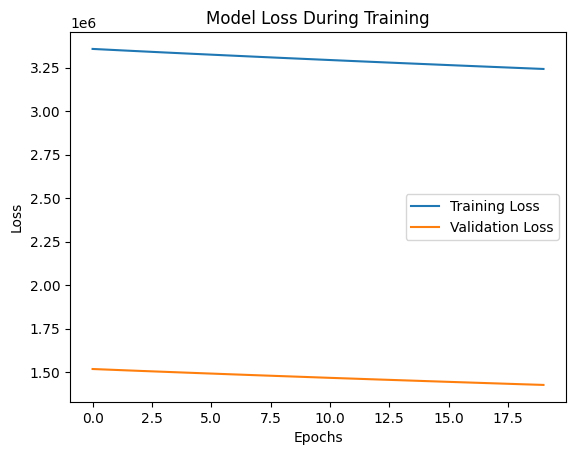

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
train_predictions = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], 1))), axis=1))[:, 0]
test_predictions = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], 1))), axis=1))[:, 0]

Y_train_actual = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], 1))), axis=1))[:, 0]
Y_test_actual = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 1))), axis=1))[:, 0]

# Evaluate the model
train_rmse = math.sqrt(mean_squared_error(Y_train_actual, train_predictions))
test_rmse = math.sqrt(mean_squared_error(Y_test_actual, test_predictions))
train_mae = mean_absolute_error(Y_train_actual, train_predictions)
test_mae = mean_absolute_error(Y_test_actual, test_predictions)
r2 = r2_score(Y_test_actual, test_predictions)

# Print metrics
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# S&P500 Work

In [1]:
!pip install tavily-python
!pip install scikit-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.4 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd

# Download historical data for the S&P 500
sp500 = yf.Ticker("^GSPC")  # Yahoo Finance symbol for S&P 500
data = sp500.history(period="5y")  # Last 5 years of data
data.reset_index(inplace=True)

#save to CSV
data.to_csv('SP500_stock_data.csv', index=False)

# Inspect the data
print(data.head())


                       Date         Open         High          Low  \
0 2019-12-11 00:00:00-05:00  3135.750000  3143.979980  3133.209961   
1 2019-12-12 00:00:00-05:00  3141.229980  3176.280029  3138.469971   
2 2019-12-13 00:00:00-05:00  3166.649902  3182.679932  3156.510010   
3 2019-12-16 00:00:00-05:00  3183.629883  3197.709961  3183.629883   
4 2019-12-17 00:00:00-05:00  3195.399902  3198.219971  3191.030029   

         Close      Volume  Dividends  Stock Splits  
0  3141.629883  3257650000        0.0           0.0  
1  3168.570068  4003200000        0.0           0.0  
2  3168.800049  3757650000        0.0           0.0  
3  3191.449951  4070200000        0.0           0.0  
4  3192.520020  3842940000        0.0           0.0  


In [3]:
!pip install --upgrade tavily-python

In [4]:
import os
from tavily import TavilyClient

# Set the API key directly
os.environ['TAVILY_API_KEY'] = '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'

# Connect to Tavily
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

In [5]:
import pandas as pd

# Initialize variables
all_data = []
page = 1  # Start with the first page
desired_articles = 50  # Specify how many articles you want
fetched_articles = 0

while fetched_articles < desired_articles:
    # Fetch results for the current page
    result = client.search("S&P 500 news articles with summary",
                           include_answer=True,
                           parameters={"answer_type": "news", "summary": True, "page": page})

    # Extract articles from the current page
    articles = result.get("results", [])
    if not articles:  # Stop if no more results
        break

    for article in articles:
        all_data.append({
            "title": article.get("title", "No Title"),
            "summary": article.get("content", "No Summary"),
            "date": article.get("published_date", "No Date")
        })
        fetched_articles += 1

        # Stop if we've reached the desired number of articles
        if fetched_articles >= desired_articles:
            break

    # Move to the next page
    page += 1

# Create a DataFrame
df = pd.DataFrame(all_data)

# Save to CSV
df.to_csv('SP500_news_articles_with_summary_and_dates.csv', index=False)

print(f"Successfully saved {len(all_data)} S&P 500 news articles!")


Successfully saved 50 S&P 500 news articles!


In [6]:
from textblob import TextBlob #using for Sentiment analysis purposes

#Due to the dates being empty, we assign a "dummy date"

for article in all_data:
  if not article.get("date") or article["date"] == "No Date":
    article["date"] = "2024-01-01" #dummy date

#creating df of all the news data

news_and_sentiment = pd.DataFrame(all_data)


#perform snetiment  on the summaries

def analyze_sentiment(text):
    """Returns a sentiment polarity score for the given text."""
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polarity ranges from -1 (negative) to +1 (positive)

# Apply sentiment analysis to the 'summary' column
df['sentiment_score'] = df['summary'].apply(lambda x: analyze_sentiment(x if x != "No Summary" else ""))

# Step 4: Save the updated DataFrame with sentiment scores to a CSV
df.to_csv('SP500_news_with_sentiment.csv', index=False)

print(f"Successfully saved {len(all_data)} S&P 500 news articles with sentiment analysis!")

Successfully saved 50 S&P 500 news articles with sentiment analysis!


Combining S&P and their sentiment

In [7]:
import pandas as pd

# Load the S&P 500 and sentiment data
sp500_data = pd.read_csv('SP500_stock_data.csv')
news_and_sentiment = pd.read_csv('SP500_news_with_sentiment.csv')

# Convert the Date columns to datetime, handling errors
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
news_and_sentiment['date'] = pd.to_datetime(news_and_sentiment['date'], errors='coerce')

# Replace NaT (Not a Time) with a dummy date if needed
news_and_sentiment['date'].fillna(pd.Timestamp('2024-01-01'), inplace=True)

# Group the news_and_sentiment data by date and average the sentiment score
# This ensures that we have a unique index for merging
news_and_sentiment_grouped = news_and_sentiment.groupby('date')['sentiment_score'].mean().reset_index()

# Rename the 'date' column to 'Date' to align it with the sp500_data
news_and_sentiment_grouped.rename(columns={'date': 'Date'}, inplace=True)

# Merge the two DataFrames based on the 'Date' column
# Using an outer join ensures we keep all dates from both DataFrames,
# and fill NaNs with 0 to replace missing sentiment
combined_data = pd.concat([sp500_data, news_and_sentiment], axis=1)

df.to_csv('SP500_combined.csv', index=False)


# Inspect the combined data
print(combined_data.head())

                        Date         Open         High          Low  \
0  2019-12-11 00:00:00-05:00  3135.750000  3143.979980  3133.209961   
1  2019-12-12 00:00:00-05:00  3141.229980  3176.280029  3138.469971   
2  2019-12-13 00:00:00-05:00  3166.649902  3182.679932  3156.510010   
3  2019-12-16 00:00:00-05:00  3183.629883  3197.709961  3183.629883   
4  2019-12-17 00:00:00-05:00  3195.399902  3198.219971  3191.030029   

         Close      Volume  Dividends  Stock Splits  \
0  3141.629883  3257650000        0.0           0.0   
1  3168.570068  4003200000        0.0           0.0   
2  3168.800049  3757650000        0.0           0.0   
3  3191.449951  4070200000        0.0           0.0   
4  3192.520020  3842940000        0.0           0.0   

                                               title  \
0  S&P 500 INDEX (^SPX) Latest Stock News & Headl...   
1  S&P 500 INDEX (^SPX) Stock Price, News, Quote ...   
2  S&P 500 Gains and Losses Today: Walgreens Pops...   
3            Stock

<ipython-input-7-d6b3083ae02a>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
<ipython-input-7-d6b3083ae02a>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news_and_sentiment['date'] = pd.to_datetime(news_and_sentiment['date'], errors='coerce')
<ipython-input-7-d6b3083ae02a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

Feature Enngineering

In [9]:
# Calculate daily percentage change (return)
combined_data['Close_pct_change'] = combined_data['Close'].pct_change()

# Create a binary target: 1 for "up", 0 for "down"
combined_data['Target'] = (combined_data['Close_pct_change'].shift(-1) > 0).astype(int)

# Create lagging features
combined_data['Prev_Close_pct_change'] = combined_data['Close_pct_change'].shift(1)
combined_data['Prev_Sentiment_Score'] = combined_data['sentiment_score'].shift(1)

# Drop rows with NaN values (e.g., first row after shifting)
combined_data.dropna(inplace=True)

print(combined_data[['Close_pct_change', 'Target', 'Prev_Close_pct_change', 'Prev_Sentiment_Score']].head())


   Close_pct_change  Target  Prev_Close_pct_change  Prev_Sentiment_Score
4          0.000335       0               0.007148              0.440510
5         -0.000432       1               0.000335              0.515152
6          0.004459       1              -0.000432              0.000000
7          0.004945       1               0.004459              0.500000
8          0.000866       0               0.004945              0.159874


Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

#Setting features and target

X = combined_data[['Prev_Close_pct_change', 'Prev_Sentiment_Score']] #this is the features
y = combined_data['Target'] # 1 is up 0 is down

#train test on 80-20 respectively

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, shuffle = False)

print("Training size:",X_train.shape)
print("Testing size:",X_test.shape)


Training size: (36, 2)
Testing size: (10, 2)


Model Train via logistic as a baseline for comparison

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.50      1.00      0.67         3

    accuracy                           0.67         9
   macro avg       0.75      0.75      0.67         9
weighted avg       0.83      0.67      0.67         9



Using a Neural Net

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np


#Faeture Engineer Data
# Calculate daily percentage change (return) - This was likely intended before but commented out or removed
combined_data['Close_pct_change'] = combined_data['Close'].pct_change()
combined_data['Target'] = (combined_data['Close_pct_change'].shift(-1) > 0).astype(int)

# Include 'Close_pct_change' in the selected columns
combined_data = combined_data[['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment_score', 'Target', 'Close_pct_change']]

# Drop rows with NaN values
combined_data.dropna(inplace=True)

# Step 2: Split data into features (X) and target (y)
X = combined_data.drop('Target', axis=1)  # Features
y = combined_data['Target']  # Target

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 4: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Early Stopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,          # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best metric
)
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1,callbacks=[early_stopping])

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 7: Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Save the model for later use
model.save("sp500_prediction_model.h5")

Epoch 1/50


<ipython-input-12-3f223c29fe02>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6429 - loss: 0.6702 - val_accuracy: 0.8750 - val_loss: 0.6527
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.6429 - loss: 0.6594 - val_accuracy: 0.8750 - val_loss: 0.6500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6429 - loss: 0.6498 - val_accuracy: 0.8750 - val_loss: 0.6477
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6429 - loss: 0.6411 - val_accuracy: 0.8750 - val_loss: 0.6457
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6429 - loss: 0.6332 - val_accuracy: 0.8750 - val_loss: 0.6433
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6429 - loss: 0.6258 - val_accuracy: 0.8750 - val_loss: 0.6408
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6429 - loss: 0.6190 - val_accuracy: 0.8750 - val_loss: 0.6381
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6429 - loss: 0.6129 - val_accuracy: 0.8750 - val_loss: 0.6355
Epoch 9/50
1

In [27]:
# prompt: show me the table for combined_data

import pandas as pd

# Assuming combined_data is already defined in your code
# Display the table
combined_data

,Open,High,Low,Close,Volume,sentiment_score,Target,Close_pct_change
5,3195.209961,3198.479980,3191.139893,3191.139893,4029950000,0.000000,1,-0.000432
6,3192.320068,3205.479980,3192.320068,3205.370117,3784360000,0.500000,1,0.004459
7,3223.330078,3225.649902,3216.030029,3221.219971,6457480000,0.159874,1,0.004945
8,3226.050049,3227.780029,3222.300049,3224.010010,3064530000,0.158333,0,0.000866
9,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.169737,1,-0.000195
10,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.500000,1,0.005128
11,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.250000,0,0.000034
12,3240.090088,3240.919922,3216.570068,3221.290039,3021720000,0.158333,1,-0.005781
13,3215.179932,3231.719971,3212.030029,3230.780029,2894760000,0.225000,1,0.002946
14,3244.669922,3258.139893,3235.530029,3257.850098,3459930000,0.100000,0,0.008379


In [29]:
# prompt: tell me the number of times the s&p500 went up and down using the "Target" variable

# Calculate the number of times the S&P 500 went up and down
up_count = combined_data[combined_data['Target'] == 1]['Target'].count()
down_count = combined_data[combined_data['Target'] == 0]['Target'].count()

print(f"Number of times S&P 500 went up: {up_count}")
print(f"Number of times S&P 500 went down: {down_count}")

Number of times S&P 500 went up: 27
Number of times S&P 500 went down: 18


Not the best, let's try something else

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Build the Neural Network with Regularization and Dropout
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Drop 30% of neurons
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.3,
    callbacks=[early_stopping],
    verbose=1
)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 7: Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Save the model for later use
model.save("sp500_prediction_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6400 - loss: 0.9848 - val_accuracy: 0.7273 - val_loss: 0.9408
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6400 - loss: 0.9839 - val_accuracy: 0.7273 - val_loss: 0.9394
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7200 - loss: 0.9530 - val_accuracy: 0.7273 - val_loss: 0.9376
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6400 - loss: 0.9247 - val_accuracy: 0.7273 - val_loss: 0.9356
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6400 - loss: 1.0235 - val_accuracy: 0.7273 - val_loss: 0.9338
Test Accuracy: 0.33


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Ensure data is in NumPy format
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build the improved Neural Network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.3,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict(X_test))
print(f"ROC-AUC Score: {roc_auc:.2f}")


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6400 - loss: 1.1806 - val_accuracy: 0.3636 - val_loss: 1.3254 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - accuracy: 0.5600 - loss: 1.5096 - val_accuracy: 0.4545 - val_loss: 1.3191 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5600 - loss: 1.1863 - val_accuracy: 0.4545 - val_loss: 1.3140 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6000 - loss: 1.2720 - val_accuracy: 0.4545 - val_loss: 1.3097 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4800 - loss: 1.3132 - val_accuracy: 0.4545 - val_loss: 1.3058 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4800 - loss: 1.3675 - val_accuracy: 0.4545 - val_loss: 1.3035 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3600 - loss: 1.6727 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         3

    accuracy                           0.56         9
   macro avg       0.31      0.42      0.36         9
weighted avg       0.42      0.56      0.48         9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
ROC-AUC Score: 0.39


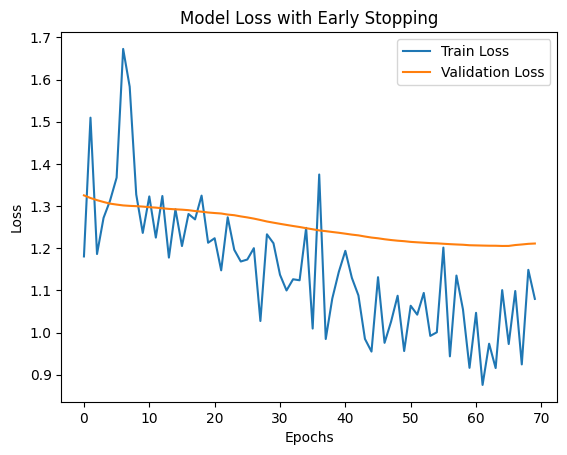

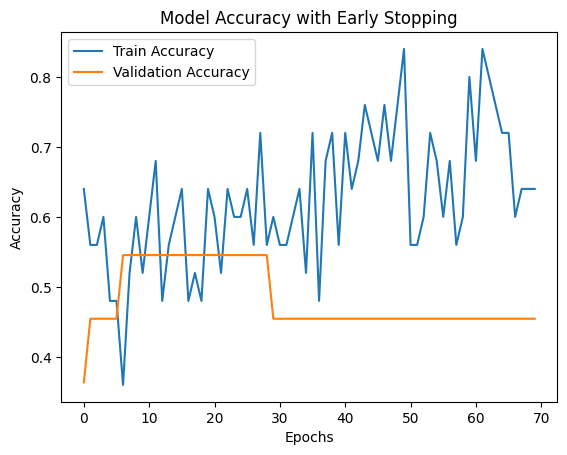

In [26]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
